To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n guides/intro-to-ploomber`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/intro-to-ploomber%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/intro-to-ploomber%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)



# Your first Python pipeline

<!-- start description -->
To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n guides/first-pipeline`

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/first-pipeline%20issue) Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)
<!-- end description -->

# Ploomber Tutorial Intro

- This should showcase the Ploomber value proposition. 
- We'll do a few ML operations in a notebook, using a sample covid-19 dataset. 
- We'll forcast the relation between testing and active covid cases.

**For a deeper dive**, try the [first-pipeline guide](https://docs.ploomber.io/en/latest/get-started/first-pipeline.html). 

If YAML, Jupyter and notebooks sounds like a distant cousin, please check our [basic concepts guide](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).

### We'll see today how you can improve your work:
- Run 100s of notebooks in parallel 
- Parameterize your workflows
- Easily generate HTML/PDF reports

# Parallelization

- Ploomber creates a pipeline for you, so you can run independent tasks simultanously. 

- It also cache some results so you don't have to wait. You can drop the `force=True` (last line) and rerun this cell.

In here we'll train 4 different models simultanously, and see it in a graph:

In [1]:
from ploomber import DAG
from ploomber.tasks import ShellScript, PythonCallable
from ploomber.products import File
from ploomber.executors import Serial

from ploomber.spec import DAGSpec
spec = DAGSpec('./pipeline.yaml')
dag = spec.to_dag()
status = dag.status()
_ = dag.build(force=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:  17%|█▋        | 1/6 [00:01<00:06,  1.38s/cell]

Executing:  83%|████████▎ | 5/6 [00:01<00:00,  3.70cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:  14%|█▍        | 1/7 [00:01<00:08,  1.45s/cell]

Executing: 100%|██████████| 7/7 [00:01<00:00,  4.02cell/s]


Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:  14%|█▍        | 1/7 [00:09<00:54,  9.17s/cell]

Executing:  57%|█████▋    | 4/7 [00:09<00:05,  1.82s/cell]

Executing: 100%|██████████| 7/7 [00:09<00:00,  1.41s/cell]


Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:  17%|█▋        | 1/6 [00:02<00:13,  2.61s/cell]

Executing: 100%|██████████| 6/6 [00:02<00:00,  2.73cell/s]

Executing: 100%|██████████| 6/6 [00:05<00:00,  1.13cell/s]


Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:  17%|█▋        | 1/6 [00:02<00:14,  2.94s/cell]

Executing: 100%|██████████| 6/6 [00:03<00:00,  2.50cell/s]

Executing: 100%|██████████| 6/6 [00:03<00:00,  1.67cell/s]


Executing:  17%|█▋        | 1/6 [00:04<00:23,  4.65s/cell]

Executing: 100%|██████████| 6/6 [00:04<00:00,  1.63cell/s]

Executing: 100%|██████████| 6/6 [00:05<00:00,  1.12cell/s]


  0%|          | 0/7 [00:00<?, ?it/s]

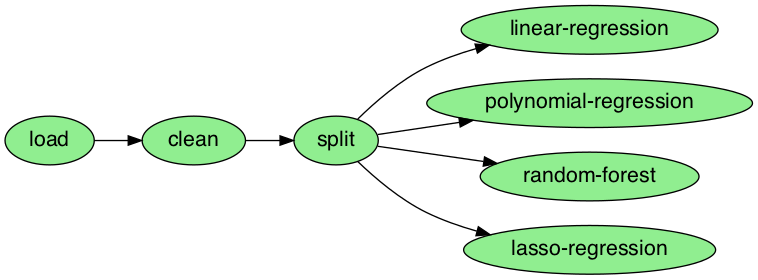

In [2]:
dag.plot()

# Parameterize workflows
- We're using our linear-regression and passing a bool flag to intercept (True/False)
- We can take the best results by parameterizing our workflow to fit different variations

In [3]:
from ploomber.spec import DAGSpec
spec = DAGSpec('./pipeline-parameterization.yaml')
dag = spec.to_dag()
status = dag.status()
_ = dag.build(force=True)

  0%|          | 0/5 [00:00<?, ?it/s]

/Users/ido.michael/opt/anaconda3/envs/projects/lib/python3.9/site-packages/ploomber/dag/dag.py:446: UserWarning: 
=========================== DAG render with warnings ===========================
- NotebookRunner: split -> MetaProduct({'X': File('output/split-X.pkl'), 'X_test': File('output/...t-X_test.pkl'), 'X_train': File('output/...-X_train.pkl'), 'nb': File('output/split.ipynb'), ...}) -
- /Users/ido.michael/Documents/ploomber/projects/guides/intro-to-ploomber/tasks/split.py -
Corrupted product metadata (<ploomber.products.metadata.MetadataCollection object at 0x15ebab970>): at least one product had a null timestamp, but others had non-null timestamp
=============================== Summary (1 task) ===============================
NotebookRunner: split -> MetaProduct({'X': File('output/split-X.pkl'), 'X_test': File('output/...t-X_test.pkl'), 'X_train': File('output/...-X_train.pkl'), 'nb': File('output/split.ipynb'), ...})
=========================== DAG render with warnings =======

  0%|          | 0/5 [00:00<?, ?it/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

  0%|          | 0/5 [00:00<?, ?it/s]

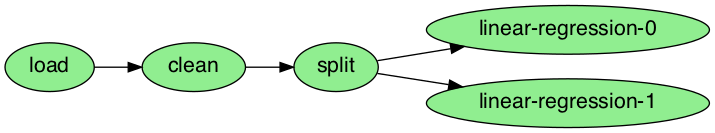

In [4]:
dag.plot()

# Automated reports

In case we have a dataset to track or a stakeholder report, we can generate it as part of our workflow.
Here we'll create a HTML report for our business persona from our previous linear regression task:

In [5]:
# open each specific html report/data
from IPython.display import IFrame
IFrame(src="./output/linear-regression.html", width='100%', height='500px')

# Where to go from here

### Usecases
Read how you can leverage this tool to [benefit your needs](https://docs.ploomber.io/en/latest/use-cases/index.html)

### Community suport
Have questions? [Ask us anything on Slack](https://ploomber.io/community/).

### Resources
**Bring your own code!** Check out the tutorial to [migrate your code to Ploomber](https://docs.ploomber.io/en/latest/user-guide/refactoring.html).

Want to dig deeper into Ploomber's core concepts? Check out [the basic concepts tutorial](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).

Want to start a new project quickly? Check out [how to get examples](https://docs.ploomber.io/en/latest/user-guide/templates.html).